In [1]:
import scipy.integrate as integrate 
import math
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.integrate as integrate 
import cmath 
from scipy import optimize
from scipy.misc import derivative
from decimal import Decimal
from decimal import *

In [2]:
 #Defining the (exact) Bosonic and fermionic thermal functions to be used it the effective potential

def Jb(m,T):
    
    def integrand(k,m,T):    
        return k**2*np.log(1 - np.exp(-np.sqrt(k**2 + (m/T)**2)))
        
    return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]   

def Jf(m,T):
    
    def integrand(k,m, T):    
        return k**2*np.log(1 + np.exp(-np.sqrt(k**2 + (m/T)**2)))
        
    return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]



# Derivatives of the thermal functions given by Jb and Jf 
# Ib is the derivative of the bosonic thermal function w.r.t m
def Ib(y):
    
    def integrand(k,y):
        return (k**2)/(np.sqrt(k**2 + y**2))*(np.exp(-np.sqrt((k**2 + y**2)))/(1 - np.exp(-np.sqrt(k**2 + y**2))))

    return -y*integrate.quad(integrand, 0, np.inf, args=(y))[0]

# If is the derivative of fermionic thermal function w.r.t. m 
def If(y):
    
    def integrand(k,y):
        return (k**2)/(np.sqrt(k**2 + y**2))*np.exp(-np.sqrt((k**2 + y**2)))/(1 + np.exp(-np.sqrt(k**2 + y**2)))

    return y*integrate.quad(integrand, 0, np.inf, args=(y))[0]




In [3]:
# Parameters and effective masses to be used in the effective potential
# constants of higgs tree level potential
mu = 3000
lam = 0.01
c6 = -1/10000
Lam = 246

#yukawa coupling constant of fermion f 
y_f = 0.99                                          #(for the top quark)

#EW - sector coupling constants g (SU(2)_L) and g_p (U(1)_Y) 
g = 0.65
g_p = 0.36
eps = 0.00001


# Effective mass of fermion f acquired through yukawa coupling w/ the Higgs
def m_f(phi):
    return y_f**2/2*phi**2 + eps

# W and Z boson masses
def m_W(phi):
    return (g**2/4)*phi**2 + eps

def m_Z(phi):
    return (g**2 + g_p**2)*phi**2/4 + eps

# Higgs and Goldstone masses
def m_h(phi):                                               
    return 3*lam*phi**2 - mu**2 - (15/4)*c6*phi**4 + eps

#m_h 0 at h_min = (2/5)*(lam/c6)*(1 - np.sqrt(1-5/3*c6*(mu**2)/lam**2))

def m_g(phi):
    return lam*phi**2 - mu**2 - (3/4)*c6*phi**4 + eps


In [ ]:
## Defining the 1-loop effective potential piece by peice starting with the tree level potential and then defining all 
## 1-loop corrections to be sumed in the final potential 

def v_0(phi):
    return -(mu**2)/2*phi**2 + (lam/4)*phi**4 - (c6/8)*phi**6


## the first loop temperature independant correction Coleman-Weinberg potential which is of the form 
## n_i*m_i(phi)**4/(64*pi**2)*(log(m_i**2/Lam**2) - c_i) where i runs over sum of all particles in the theory and n_i is 
## the particle's degree of freedom.  Separating the gauge bosons from the rest of the particles

def v_cw(m2):
    return (m2**2)/(64*np.pi**2)*(cmath.log(m2/Lam**2) - 3/2)

def v_cwg(m2):
    return (m2**2)/(64*np.pi**2)*(cmath.log(m2/Lam**2) - 5/6)
    
# High T limits of the thermal functions denoted by jb and jf

def jb(x):
    a = np.exp(5.4067)
    return (np.pi**2/12)*x - (np.pi/6)*cmath.sqrt(x)**3 - (x**2/32)*cmath.log(x/a)


def jf(x):
    a = np.exp(2.6351)
    return -((np.pi**2)/24)*x - (x**2/32)*cmath.log(x/a)



Text(0.5, 1.0, 'SMEFT effective potential at T = 1100')

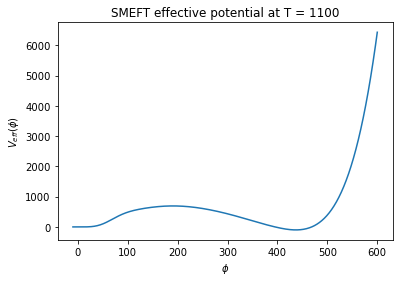

In [50]:
Lam = 246     # regulator/Cutoff(?)

#1-loop effective potential
def v_eff(phi,T):
    return np.real(-(mu**2)/2*phi**2 + (lam/4)*phi**4 - (c6/8)*phi**6
            + m_h(phi)**2/(64*np.pi**2)*(cmath.log(m_h(phi)/Lam) - 3/2) + Jb(m_h(phi),T)
            + 3*m_g(phi)**2/(64*np.pi**2)*(cmath.log(m_g(phi)/Lam) - 3/2) + 3*Jb(m_g(phi),T)
            + 3*m_Z(phi)**2/(64*np.pi**2)*(cmath.log(m_Z(phi)/Lam) - 5/6) + 3*Jb(m_Z(phi),T)
            + 6*m_W(phi)**2/(64*np.pi**2)*(cmath.log(m_W(phi)/Lam) - 5/6) + 6*Jb(m_W(phi),T)    
            - 12*m_f(phi)**2/(64*np.pi**2)*(cmath.log(m_f(phi)/Lam) - 3/2) - 12*Jf(m_f(phi),T)
           )/(Lam**4)

vecv_eff = np.vectorize(v_eff)


phi = np.linspace(-10,600,500)
T = 1100
arrv_eff = vecv_eff(phi,T) - v_eff(0,T)


plt.plot(phi, arrv_eff)
#plt.legend(loc = "lower left")
plt.xlabel('$\phi$')
plt.ylabel('$V_{eff}(\phi)$')
plt.title('SMEFT effective potential at T = %1.0f'  % T)
#plt.ylim(-0.1*1e13, 1*1e13)

#Tree level min
#phi_min = ((2*lam)/(3*c6))*(1 - np.sqrt(1 - (3*c6*mu**2)/(lam**2)))


In [ ]:
#Finding the critical temperature where the effective potential acquires the same value at both minima


# defining a recursive method for finding the critical temperature up to some tolerance which is chosen when calling the 
# function. The function requires a span/interval of temperaturs to as to where it  
#
# The effective potential is normalized so that the first minimum is at v_eff(phi = 0) regadless of T   
# 
#
#
#

def find_t_crit(t_span, tolerance):
    T = np.mean(t_span)
    
    def v_eff_T(phi):
        T = np.mean(t_span)
        return v_eff(phi,T) - v_eff(0,T)
    min2 = v_eff_T(optimize.fmin(v_eff_T, 600)[0])
    
    
    if abs(min2) < tolerance:
        return T
    elif min2 > tolerance:                                      
        return find_t_crit([t_span[0], np.mean(t_span)],tolerance)
    elif min2 < -tolerance:
        return find_t_crit([np.mean(t_span), t_span[1]],tolerance)    
    
    return T


t_span = [1000, 1300]
tolerance = 1

t_c = find_t_crit(t_span, tolerance)   
print(t_c)

In [51]:
# Finding the bounce action.  
tc = 1100

def v_eff_tc(phi):
    return np.vectorize(v_eff)(phi,tc) - np.vectorize(v_eff)(0,tc)

arrv_eff = vecv_eff(phi,tc) - v_eff(0,tc)

def v_p(phi):
    return derivative(v_eff_tc, phi, dx = 0.01)

false_vac = optimize.fmin(v_eff_tc, 600)[0]
true_vac = optimize.fmin(v_eff_tc, 0)[0]


print(false_vac)
print(true_vac)


def f(t,y):    
    A = y[0]
    B = y[1]
    
    dA_dt = B
    dB_dt = v_p(A) - (2/t)*B

    return np.array([dA_dt, dB_dt])


Optimization terminated successfully.
         Current function value: -98.846052
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -0.017689
         Iterations: 30
         Function evaluations: 60
436.8891906738281
5.356562500000008


In [ ]:
plt.plot(phi, v_p(phi))

157.32250339461154
157.32250339461154


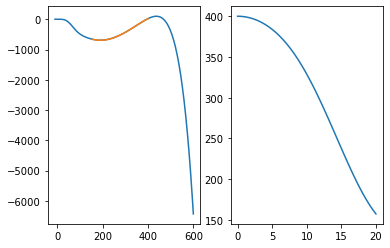

In [53]:
t_span = np.array([0.00001,20])

times = np.linspace(t_span[0], t_span[1], 100)

#Chosing some initial value for t and having zero velocity at t = 0

y0 = np.array([400, 0])       

soln = solve_ivp(f, t_span, y0, method = 'Radau', vectorized = True, t_eval = times)

t = soln.t
phi_b = soln.y[0]

print(phi_b[-1])
print(min(phi_b))

plt.subplot(1,2,1)
plt.plot(phi, -arrv_eff, phi_b, -v_eff_tc(phi_b))

plt.subplot(1,2,2)
plt.plot(t,phi_b)

In [ ]:
t_span = np.array([0.001,20])

times = np.linspace(t_span[0], t_span[1], 1000)

def over_undershoot(init_span, tol):
    
    init = Decimal(np.mean(init_span))
    y0 = np.array([init, 0])
    
    soln = solve_ivp(f, t_span, y0, t_eval = times)

    t = soln.t
    phi_b = soln.y[0]
    
    if np.abs(phi_b[-1] - true_vac) <= tol:
        
        return phi_b, t
    
    elif phi_b[-1] > 474  :
        #condition for rolling down to the right towards phi = +inf  
        #This means we are too far to the right of the false vacuum.
        
        print('y0 = %1.8f to +infinity and beyond!' % init) 
        return over_undershoot([init_span[0], init], tol)
    elif phi_b[-1] > tol:                                     
        # this is condition for undershoot
        # need to look higher up in the interval for the correct initial value
        
        print('y0 = %1.8f results in undershoot'  % init)
        print('smallest value of the solution: %1.8f' % min(phi_b))
        return over_undershoot([init, init_span[1]],tol)
    
    elif phi_b[-1] < -tol:                                     
        # condition for overshoot, solution has passed phi = 0
        # need to lower the initial value
        
        print('y0 = %1.8f results in overshoot: To -infinity and beyond!'  % init)
        return over_undershoot([init_span[0], init], tol)
    
    return phi_b, t

    

              
init_span = np.array([200, 436])    
tol = 10

phi_b , t = over_undershoot(init_span,tol)

plt.plot(t, phi_b)